# 1. 특성공학(Feature Engineering)
: 컴퓨터가 학습할때, 일반화 된 수식을 도출할 수 있도록 데이터를 깔끔하게 다듬는 작업 <br/>
* imputation : 결측치 되어 있는 값을 다른 값으로 대체
    * 평균, 중앙값, 최대값
    * 결측치 == Missing Value == Null 
    * 새로운 데이터 입력되어도 결측가 계속 발생한다.<br/><br/>
* Scaling & Encoding
    * Scaling : 숫자 데이터의 서로 다른 차원(Scale)을 맞추는 작업
    * Encoding : 문자 데이터를 숫자 데이터로 변환 <br/><br/>
    
* Cross Validation : 데이터셋이 모두 학습에 참여할 수 있도록, 학습데이터 셋을 교차로 바꿔가며 학습을 진행하는 방식 <br/><br/>   

* Hypter Parameter Tuning : 데이터를 학습할 때 발생하는 알고리즘의 수학적 구조를 사용자가 통제  <br/><br/>

* Sampling : 서로 다른 비율의 데이터를 맞춰주는 작업
    * Under Sampling : 데이터의 비율이 적은쪽으로 데이터를 맞추는 작업
    * Over Sampling : 데이터의 비율이 큰쪽으로 데이터를 생성하는 작업

### 1-1. Imputation
* 결측치 되어 있는 값을 다른 값으로 대체 (평균, 중앙값, 최대값)
* 결측치 == Missing Value == Null

In [120]:
import pandas as pd
import numpy as np

In [121]:
df=pd.read_csv('..\SampleData\DataStation\Feature01.csv', encoding='cp949')

In [122]:
df.head()

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [123]:
df.shape

(51304, 18)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         51304 non-null  int64  
 1   id                 51304 non-null  int64  
 2   type_of_contract   51300 non-null  object 
 3   type_of_contract2  51303 non-null  object 
 4   channel            51304 non-null  object 
 5   datetime           51304 non-null  object 
 6   Term               51304 non-null  int64  
 7   payment_type       51304 non-null  object 
 8   product            51303 non-null  object 
 9   amount             51304 non-null  int64  
 10  state              51304 non-null  object 
 11  overdue_count      51304 non-null  int64  
 12  overdue            51302 non-null  object 
 13  credit rating      42521 non-null  float64
 14  bank               48544 non-null  object 
 15  cancellation       51279 non-null  object 
 16  age                405

In [125]:
df.isnull().sum() 

Unnamed: 0               0
id                       0
type_of_contract         4
type_of_contract2        1
channel                  0
datetime                 0
Term                     0
payment_type             0
product                  1
amount                   0
state                    0
overdue_count            0
overdue                  2
credit rating         8783
bank                  2760
cancellation            25
age                  10795
Mileage              10795
dtype: int64

In [126]:
# df.columns

In [127]:
new_df=df[['age', 'overdue_count', 'credit rating']]   # 나이, 연체건수, 신용등급

In [129]:
new_df.head()

,age,overdue_count,credit rating
0,43.0,0,9.0
1,62.0,0,2.0
2,60.0,0,8.0
3,60.0,0,5.0
4,51.0,12,8.0


In [130]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            40509 non-null  float64
 1   overdue_count  51304 non-null  int64  
 2   credit rating  42521 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.2 MB


In [131]:
new_df.shape

(51304, 3)

In [132]:
new_df.isnull().sum()

age              10795
overdue_count        0
credit rating     8783
dtype: int64

#### 가. impute 사용 이유
* 새로운 데이터가 들어와도 계속 결측치가 계속 발생한다. (신용등급)
* 기존 결측치 제거 예)
    * new_df.dropna()
    * new_df.fillna(0)
    * new_df.fillna(df.mean())	  

In [139]:
import sklearn
from sklearn.impute import SimpleImputer

In [140]:
 sklearn.__version__                    # 1.0.2  Upgrade check

'1.0.2'

In [141]:
imputer=SimpleImputer(strategy="mean")   # mean평균값, median중앙값, most_frequent최빈값, constant 정해진값
imputer.fit(new_df)

SimpleImputer()

In [142]:
imputer.transform(new_df)

array([[43.,  0.,  9.],
       [62.,  0.,  2.],
       [60.,  0.,  8.],
       ...,
       [51.,  0.,  1.],
       [64.,  0.,  2.],
       [53.,  0.,  8.]])

In [144]:
imputer_df=pd.DataFrame(imputer.transform(new_df))

In [145]:
imputer_df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [146]:
imputer_df.describe()

,0,1,2
count,51304.000000,51304.000000,51304.000000
mean,46.608285,0.161040,3.428894
std,11.965666,1.122356,2.015220
min,20.000000,-1.000000,0.000000
25%,39.000000,0.000000,2.000000
50%,46.608285,0.000000,3.428894
75%,53.000000,0.000000,5.000000
max,107.000000,15.000000,10.000000


In [147]:
new_df.describe()          # imp_df imputer 비교한 사분위 값

,age,overdue_count,credit rating
count,40509.000000,51304.000000,42521.000000
mean,46.608285,0.161040,3.428894
std,13.465977,1.122356,2.213590
min,20.000000,-1.000000,0.000000
25%,37.000000,0.000000,1.000000
50%,46.000000,0.000000,3.000000
75%,56.000000,0.000000,5.000000
max,107.000000,15.000000,10.000000


#### 나. 학습

In [148]:
X=imputer_df
Y=df['amount']

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=1234)

In [151]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [152]:
""" 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

평가는 나중에~~~ 

Y_test_pred=model.predict(X_test)
mse=mean_squared_error(Y_test, Y_test_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)  

model.score(X_test, Y_test)
model.score(X_train, Y_train) 
"""

' \nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.metrics import accuracy_score\n\n평가는 나중에~~~ \n\nY_test_pred=model.predict(X_test)\nmse=mean_squared_error(Y_test, Y_test_pred)\nrmse=np.sqrt(mse)\nprint(mse)\nprint(rmse)  \n\nmodel.score(X_test, Y_test)\nmodel.score(X_train, Y_train) \n'

### 1-2. Scaling - 숫자
* Scaling : 숫자데이터의 서로 다른 차원(Scale)을 맞춰주는 작업
    * Standard Scaling : 평균 0, 표준편차 1
    * Robust Scaling : 중앙값 0, 사분범위 1
    * Min Max Scaling : 최소값 0, 최대값 1

In [153]:
# df=pd.read_csv('..\SampleData\DataStation\Feature01.csv', encoding='cp949')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         51304 non-null  int64  
 1   id                 51304 non-null  int64  
 2   type_of_contract   51300 non-null  object 
 3   type_of_contract2  51303 non-null  object 
 4   channel            51304 non-null  object 
 5   datetime           51304 non-null  object 
 6   Term               51304 non-null  int64  
 7   payment_type       51304 non-null  object 
 8   product            51303 non-null  object 
 9   amount             51304 non-null  int64  
 10  state              51304 non-null  object 
 11  overdue_count      51304 non-null  int64  
 12  overdue            51302 non-null  object 
 13  credit rating      42521 non-null  float64
 14  bank               48544 non-null  object 
 15  cancellation       51279 non-null  object 
 16  age                405

In [155]:
new_df=df[["credit rating", "overdue_count", "age", "amount", "Term"]]      # 신용등급, 연체건수, 나이, 계약금액, 계약기간  
new_df

,credit rating,overdue_count,age,amount,Term
0,9.0,0,43.0,96900,60
1,2.0,0,62.0,102900,60
2,8.0,0,60.0,96900,60
3,5.0,0,60.0,66900,12
4,8.0,12,51.0,66900,12
...,...,...,...,...,...
51299,NaN,0,NaN,96900,60
51300,8.0,0,39.0,96900,60
51301,1.0,0,51.0,120900,39
51302,2.0,0,64.0,96900,60


In [156]:
new_df.describe()                                                           # 스케일 차이가 많이 난다. (예측에서 문제 일어 날 수 있다. )

,credit rating,overdue_count,age,amount,Term
count,42521.000000,51304.000000,40509.000000,51304.000000,51304.000000
mean,3.428894,0.161040,46.608285,93994.980021,55.638527
std,2.213590,1.122356,13.465977,15305.147334,12.010117
min,0.000000,-1.000000,20.000000,54603.000000,12.000000
25%,1.000000,0.000000,37.000000,81900.000000,60.000000
50%,3.000000,0.000000,46.000000,96900.000000,60.000000
75%,5.000000,0.000000,56.000000,98400.000000,60.000000
max,10.000000,15.000000,107.000000,215700.000000,60.000000


In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#### 가. Standard Scaling
* 평균 0, 표준편차 1
        

In [158]:
scaler=StandardScaler()
scaler.fit(new_df)

StandardScaler()

In [159]:
pd.DataFrame(scaler.transform(new_df)).describe()    # -4.854370e-17	0.000 17번쨰 자리 -4~~~~

,0,1,2,3,4
count,4.252100e+04,5.130400e+04,4.050900e+04,5.130400e+04,5.130400e+04
mean,-4.854370e-17,-4.096166e-16,-1.570575e-16,1.327427e-14,-1.155818e-14
std,1.000012e+00,1.000010e+00,1.000012e+00,1.000010e+00,1.000010e+00
min,-1.549037e+00,-1.034477e+00,-1.975988e+00,-2.573798e+00,-3.633516e+00
25%,-1.097277e+00,-1.434854e-01,-7.135318e-01,-7.902634e-01,3.631535e-01
50%,-1.937572e-01,-1.434854e-01,-4.517252e-02,1.898086e-01,3.631535e-01
75%,7.097630e-01,-1.434854e-01,6.974489e-01,2.878158e-01,3.631535e-01
max,2.968563e+00,1.322139e+01,4.484818e+00,7.951979e+00,3.631535e-01


#### 나. Robust Scaling
* 이상치 : 예) amount 215700.000000 특이하게 이상한 값
* 중앙값 0, 사분범위 1
* 실무에서 많이 사용

In [160]:
scaler=RobustScaler()
scaler.fit(new_df)

RobustScaler()

In [161]:
pd.DataFrame(scaler.transform(new_df)).describe()    # 50%:0,    25%/75%:1,   특정값으로 이루어져 있는 데이터는 빼는게 좋다

,0,1,2,3,4
count,42521.000000,51304.000000,40509.000000,51304.000000,51304.000000
mean,0.107223,0.161040,0.032015,-0.176062,-4.361473
std,0.553398,1.122356,0.708736,0.927585,12.010117
min,-0.750000,-1.000000,-1.368421,-2.563455,-48.000000
25%,-0.500000,0.000000,-0.473684,-0.909091,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,0.526316,0.090909,0.000000
max,1.750000,15.000000,3.210526,7.200000,0.000000


#### 다. Min Max Scaling 
* 최소값 0, 최대값 1
* 간혹 분류 모델에서 사용

In [162]:
scaler=MinMaxScaler()
scaler.fit(new_df)

MinMaxScaler()

In [163]:
pd.DataFrame(scaler.transform(new_df)).describe()

,0,1,2,3,4
count,42521.000000,51304.000000,40509.000000,51304.000000,51304.000000
mean,0.342889,0.072565,0.305842,0.244523,0.909136
std,0.221359,0.070147,0.154781,0.095006,0.250211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.062500,0.195402,0.169444,1.000000
50%,0.300000,0.062500,0.298851,0.262556,1.000000
75%,0.500000,0.062500,0.413793,0.271867,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


### 1-3. Encoding - 문자
: 문자 데이터를 숫자 데이터로 변환
#### 가. Label Encoding 
* 주로 사용 하는 경우 남0, 여1, / 정상0, 불량1
* 잘 사용 안함 (데이터 간 서열 갖는다. 위험함!) <br/>
<table align="left">
    <tr>
        <td>인천</td>
        <td>1</td>
    </tr>
    <tr>
        <td>서울</td>
        <td>2</td>
    </tr>
    <tr>
        <td>경기</td>
        <td>3</td>
    </tr>
    <tr>
        <td>인천</td>
        <td>1</td>
    </tr>
</table><br/><br/>

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
df.head()

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [166]:
new_df=df["type_of_contract"]
new_df.shape

(51304,)

In [167]:
new_df.value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

In [168]:
new_df.isnull().sum()

4

In [169]:
label_df=new_df.dropna()

In [170]:
label_df.isnull().sum()

0

In [171]:
encoder=LabelEncoder()
encoder.fit(label_df)

LabelEncoder()

In [172]:
encoder_df=pd.Series(encoder.fit_transform(label_df))
encoder_df.value_counts()

0    46481
1     4819
dtype: int64

In [173]:
encoder_df.head()

0    0
1    0
2    0
3    1
4    1
dtype: int32

#### 나. One-hot encoding

In [174]:
df['channel'].value_counts()

서비스 방문     15186
홈쇼핑/방송     12977
렌탈총판        5544
R관리방판       4727
하이마트        3227
영업방판        3039
렌탈재계약       2193
일반          1232
전자랜드        1205
R빌리미         560
이마트          265
홈플러스         225
R인터넷         198
R유통사         188
홈쇼핑/인터넷      177
R렌탈운영        120
R농협          119
R농협인터넷몰       83
R법인그룹         20
R법인           19
Name: channel, dtype: int64

In [175]:
pd.get_dummies(df['channel'])

,R관리방판,R농협,R농협인터넷몰,R렌탈운영,R법인,R법인그룹,R빌리미,R유통사,R인터넷,렌탈재계약,렌탈총판,서비스 방문,영업방판,이마트,일반,전자랜드,하이마트,홈쇼핑/방송,홈쇼핑/인터넷,홈플러스
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51300,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
51301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
51302,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [176]:
pd.get_dummies(df)

,Unnamed: 0,id,Term,amount,overdue_count,credit rating,age,Mileage,type_of_contract_렌탈,type_of_contract_멤버십,...,bank_제주은행,bank_하나SK,bank_하나대투증권,bank_하나은행,bank_하이투자증권,bank_한국투자증권,bank_현대증권,bank_현대카드,cancellation_정상,cancellation_해약
0,0,66758234,60,96900,0,9.0,43.0,1862.0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,66755948,60,102900,0,2.0,62.0,2532.0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,2,66756657,60,96900,0,8.0,60.0,2363.0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3,66423450,12,66900,0,5.0,60.0,2449.0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,4,66423204,12,66900,12,8.0,51.0,1942.0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,51299,66579515,60,96900,0,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,1,0
51300,51300,66799558,60,96900,0,8.0,39.0,1753.0,1,0,...,0,0,0,0,0,0,0,0,0,1
51301,51301,66799197,39,120900,0,1.0,51.0,2217.0,1,0,...,0,0,0,0,0,0,0,0,0,1
51302,51302,66792778,60,96900,0,2.0,64.0,2588.0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### 다. 학습

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         51304 non-null  int64  
 1   id                 51304 non-null  int64  
 2   type_of_contract   51300 non-null  object 
 3   type_of_contract2  51303 non-null  object 
 4   channel            51304 non-null  object 
 5   datetime           51304 non-null  object 
 6   Term               51304 non-null  int64  
 7   payment_type       51304 non-null  object 
 8   product            51303 non-null  object 
 9   amount             51304 non-null  int64  
 10  state              51304 non-null  object 
 11  overdue_count      51304 non-null  int64  
 12  overdue            51302 non-null  object 
 13  credit rating      42521 non-null  float64
 14  bank               48544 non-null  object 
 15  cancellation       51279 non-null  object 
 16  age                405

In [178]:
new_df=df[["type_of_contract", "Term", "amount", "age", "overdue_count", "credit rating", "state"]]
new_df.head()

,type_of_contract,Term,amount,age,overdue_count,credit rating,state
0,렌탈,60,96900,43.0,0,9.0,계약확정
1,렌탈,60,102900,62.0,0,2.0,계약확정
2,렌탈,60,96900,60.0,0,8.0,계약확정
3,멤버십,12,66900,60.0,0,5.0,계약확정
4,멤버십,12,66900,51.0,12,8.0,해약확정


In [179]:
new_df["state"].value_counts()

계약확정     50350
해약확정       907
기간만료        33
해약진행중       14
Name: state, dtype: int64

In [180]:
new_df["target"]=new_df["state"].replace({"계약확정":0, "기간만료":0,
                                          "해약확정":1, "해약진행중":1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
new_df["target"].value_counts()

0    50383
1      921
Name: target, dtype: int64

In [182]:
new_df.head()

,type_of_contract,Term,amount,age,overdue_count,credit rating,state,target
0,렌탈,60,96900,43.0,0,9.0,계약확정,0
1,렌탈,60,102900,62.0,0,2.0,계약확정,0
2,렌탈,60,96900,60.0,0,8.0,계약확정,0
3,멤버십,12,66900,60.0,0,5.0,계약확정,0
4,멤버십,12,66900,51.0,12,8.0,해약확정,1


In [183]:
hot_df=new_df.dropna()

In [184]:
hot_df.isnull().sum()

type_of_contract    0
Term                0
amount              0
age                 0
overdue_count       0
credit rating       0
state               0
target              0
dtype: int64

In [185]:
imsi_X=hot_df.drop(columns=["target", "state"])         # Y값을 제외한
X=pd.get_dummies(imsi_X)

Y=hot_df["target"]

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [187]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=1234)

In [188]:
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

### 1-4. Cross Validation (교차검증)
: 데이터를 번갈아 가며, 학습 및 검증 작업 진행

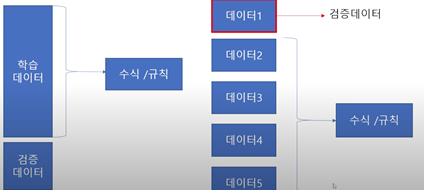

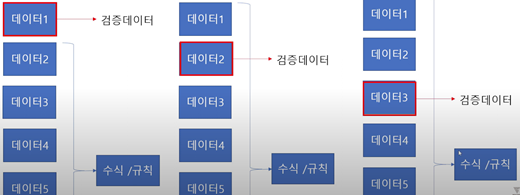

In [204]:
import pandas as pd
import numpy as np

In [190]:
df=pd.read_csv("..\SampleData\DataStation\Feature01.csv", encoding='cp949')
df.head()

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [191]:
df['state'].value_counts()

계약확정     50350
해약확정       907
기간만료        33
해약진행중       14
Name: state, dtype: int64

In [192]:
df['target']=df['state'].replace({'계약확정':0, '기간만료':0, 
                                      '해약확정':1, '해약진행중':1})

In [193]:
cross_df=df.dropna()

In [194]:
X=pd.get_dummies(cross_df[['age', 'Term', 'type_of_contract', 'amount', 'overdue_count']])    # One-hot Encoding
Y=cross_df[['target']]

In [195]:
X

,age,Term,amount,overdue_count,type_of_contract_렌탈,type_of_contract_멤버십
0,43.0,60,96900,0,1,0
1,62.0,60,102900,0,1,0
2,60.0,60,96900,0,1,0
3,60.0,12,66900,0,0,1
4,51.0,12,66900,12,0,1
...,...,...,...,...,...,...
51295,48.0,39,120900,0,1,0
51296,44.0,60,96900,0,1,0
51297,70.0,60,96900,0,1,0
51300,39.0,60,96900,0,1,0


In [196]:
Y

,target
0,0
1,0
2,0
3,0
4,1
...,...
51295,1
51296,0
51297,1
51300,1


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [201]:
XX=X.values      # pandas - numpy
YY=Y.values
XX

array([[4.300e+01, 6.000e+01, 9.690e+04, 0.000e+00, 1.000e+00, 0.000e+00],
       [6.200e+01, 6.000e+01, 1.029e+05, 0.000e+00, 1.000e+00, 0.000e+00],
       [6.000e+01, 6.000e+01, 9.690e+04, 0.000e+00, 1.000e+00, 0.000e+00],
       ...,
       [7.000e+01, 6.000e+01, 9.690e+04, 0.000e+00, 1.000e+00, 0.000e+00],
       [3.900e+01, 6.000e+01, 9.690e+04, 0.000e+00, 1.000e+00, 0.000e+00],
       [5.300e+01, 6.000e+01, 9.690e+04, 0.000e+00, 1.000e+00, 0.000e+00]])

In [202]:
model=DecisionTreeClassifier()
score=cross_val_score(model, XX, YY, cv=5)       # 교차검증 5번한다.

In [203]:
score

array([0.98147233, 0.98147233, 0.98246047, 0.9819664 , 0.98233696])

In [205]:
np.mean(score)

0.981941699604743

### 1-5. Hypter Parameter Tuning
: 데이터를 학습할 때 발생하는 알고리즘의 수학적 구조를 사용자가 통제
* Random Search - 무작위로 알고리즘의 수학적 구조를 통제하여, 데이터셋에 적합한 수학적 구조를 생성한다.
* Grid Search - 사용자가 설정한 임의의 알고리즘 구조를 통제하여, 데이터셋에 적합한 수학적 구조를 생성하고 교차 검증과 같이 사용한다.

In [207]:
df=pd.read_csv("..\SampleData\DataStation\Cell_Data02.csv", encoding="cp949")

In [208]:
df

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Radius,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim
0,842302,M,17.99,122.80,1001.0,10.38,0.12,0.27760,0.30010,0.1471,...,1.0950,8.589,153.40,0.9053,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062
1,842517,M,20.57,132.90,1326.0,17.77,0.08,0.07864,0.08690,0.0702,...,0.5435,3.398,74.08,0.7339,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035
2,84300903,M,19.69,130.00,1203.0,21.25,0.11,0.15990,0.19740,0.1279,...,0.7456,4.585,94.03,0.7869,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046
3,84348301,M,11.42,77.58,386.1,20.38,0.14,0.28390,0.24140,0.1052,...,0.4956,3.445,27.23,1.1560,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092
4,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.13280,0.19800,0.1043,...,0.7572,5.438,94.44,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,142.00,1479.0,22.39,0.11,0.11590,0.24390,0.1389,...,1.1760,7.673,158.70,1.2560,0.0103,0.0289,0.0520,0.0245,0.0111,0.0042
565,926682,M,20.13,131.20,1261.0,28.25,0.10,0.10340,0.14400,0.0979,...,0.7655,5.203,99.04,2.4630,0.0058,0.0242,0.0395,0.0168,0.0190,0.0025
566,926954,M,16.60,108.30,858.1,28.08,0.08,0.10230,0.09251,0.0530,...,0.4564,3.425,48.55,1.0750,0.0059,0.0373,0.0473,0.0156,0.0132,0.0039
567,927241,M,20.60,140.10,1265.0,29.33,0.12,0.27700,0.35140,0.1520,...,0.7260,5.772,86.22,1.5950,0.0065,0.0616,0.0712,0.0166,0.0232,0.0062


In [211]:
df.isnull().sum()

Image ID               0
Diagnosis              0
Mean Radius            0
Mean Perimeter         0
Mean Area              0
Mean Texture           0
Mean Smoothness        0
Mean Compactness       0
Mean Concavity         0
Mean Concave Points    0
Mean Symmetry          0
Mean Fractal Dim       0
Max Radius             0
Max Perimeter          0
Max Area               0
Max Texture            0
Max Smoothness         0
Max Compactness        0
Max Concavity          0
Max Concave Points     0
Max Symmetry           0
Max Fractal Dim        0
SE Radius              0
SE Perimeter           0
SE Area                0
SE Texture             0
SE Smoothness          0
SE Compactness         0
SE Concavity           0
SE Concave Points      0
SE Symmetry            0
SE Fractal Dim         0
dtype: int64

In [212]:
df.columns

Index(['Image ID', 'Diagnosis', 'Mean Radius', 'Mean Perimeter', 'Mean Area',
       'Mean Texture', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dim',
       'Max Radius', 'Max Perimeter', 'Max Area', 'Max Texture',
       'Max Smoothness', 'Max Compactness', 'Max Concavity',
       'Max Concave Points', 'Max Symmetry', 'Max Fractal Dim', 'SE Radius',
       'SE Perimeter', 'SE Area', 'SE Texture', 'SE Smoothness',
       'SE Compactness', 'SE Concavity', 'SE Concave Points', 'SE Symmetry',
       'SE Fractal Dim'],
      dtype='object')

In [215]:
X=df[['Mean Radius', 'Mean Perimeter', 'Mean Area',
       'Mean Texture', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dim']]

In [216]:
X

,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dim
0,17.99,122.80,1001.0,10.38,0.12,0.27760,0.30010,0.1471,0.2419,0.07871
1,20.57,132.90,1326.0,17.77,0.08,0.07864,0.08690,0.0702,0.1812,0.05667
2,19.69,130.00,1203.0,21.25,0.11,0.15990,0.19740,0.1279,0.2069,0.05999
3,11.42,77.58,386.1,20.38,0.14,0.28390,0.24140,0.1052,0.2597,0.09744
4,20.29,135.10,1297.0,14.34,0.10,0.13280,0.19800,0.1043,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,22.39,0.11,0.11590,0.24390,0.1389,0.1726,0.05623
565,20.13,131.20,1261.0,28.25,0.10,0.10340,0.14400,0.0979,0.1752,0.05533
566,16.60,108.30,858.1,28.08,0.08,0.10230,0.09251,0.0530,0.1590,0.05648
567,20.60,140.10,1265.0,29.33,0.12,0.27700,0.35140,0.1520,0.2397,0.07016


In [210]:
df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [217]:
Y=df['Diagnosis'].replace('B', 0).replace('M', 1)
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#### 가. Grid Search 
* 사용자가 설정한 임의의 알고리즘 구조를 통제하여, 
  데이터셋에 적합한 수학적 구조를 생성하고 교차 검증과 같이 사용한다.

In [219]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=1234)

In [220]:
model=DecisionTreeClassifier()  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
hyper_parameter={"max_depth":[3, 4, 5, 6, 7, 8]}
grid_model=GridSearchCV(model, param_grid=hyper_parameter, cv=5)

In [221]:
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8]})

In [223]:
best_model=grid_model.best_estimator_
best_model

DecisionTreeClassifier(max_depth=4)

In [224]:
Y_train_pred=best_model.predict(X_train)
Y_test_pred=best_model.predict(X_test)

In [226]:
accuracy_score(Y_train, Y_train_pred)

0.9798994974874372

In [227]:
accuracy_score(Y_test, Y_test_pred)

0.9005847953216374

### 1-6. Sampling
: 서로 다른 비율의 데이터를 맞춰주는 작업

* Under Sampling : 데이터 수가 많은 항목을 적은 항목으로 맞추는 작업
    * Random Under Sampling, Tornek's link <br/><br/>
* Over Sampling : 데이터 수가 적은 항목을 많은 항목으로 맞추는 작업
    * SMOTE, ADASYN, Random Over Sampling <br/><br/>
    
* 예] 제품이 불량, 정상 구분하는 분류 모델
    * 제품 1000개중 정상 900, 불량 100
        * Under Sampling : (정) 100 / (불) 100
        * Over Sampling  : (정) 900 / (불) 900

In [229]:
df=pd.read_csv("..\SampleData\DataStation\Feature01.csv", encoding='cp949')
df.head()

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [230]:
df['state'].value_counts()

계약확정     50350
해약확정       907
기간만료        33
해약진행중       14
Name: state, dtype: int64

In [231]:
df['target']=df['state'].replace({"계약확정":0, "기간만료":0, 
                                  "해약확정":1, "해약진행중":1})

In [232]:
df['target'].value_counts()

0    50383
1      921
Name: target, dtype: int64

#### 가. Under Sampling

In [281]:
!pip install imblearn

In [282]:
from imblearn.under_sampling import RandomUnderSampler

In [283]:
new_df=df.dropna()

In [284]:
X=new_df.drop(columns='target')
Y=new_df['target']

In [289]:
sampler=RandomUnderSampler()
sampler.fit(X, Y)

RandomUnderSampler()

In [290]:
X_under, Y_under=sampler.fit_resample(X, Y)

In [291]:
Y_under.value_counts()

1    679
0    679
Name: target, dtype: int64

In [292]:
X_under.shape

(1358, 18)

#### 나. Over Sampling

In [293]:
from imblearn.over_sampling import SMOTE

In [297]:
XX=pd.get_dummies(X)

In [299]:
sampler=SMOTE()
sampler.fit(XX, Y)

SMOTE()

In [301]:
X_over, Y_over=sampler.fit_resample(XX, Y) 

In [302]:
Y_over.value_counts()

1    39801
0    39801
Name: target, dtype: int64

In [303]:
X_over.shape

(79602, 196)

### 1-7. Pip Line
: 특성공학과 학습을 통시에 수행 시킬 수 있는 구조

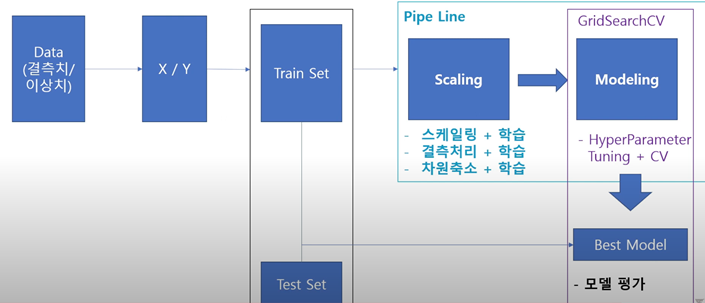

In [249]:
df=pd.read_csv("..\SampleData\DataStation\Feature01.csv", encoding='cp949')
df.head()

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [250]:
df['state'].value_counts()

계약확정     50350
해약확정       907
기간만료        33
해약진행중       14
Name: state, dtype: int64

In [251]:
df['target']=df['state'].replace({"계약확정":0, "기간만료":0, 
                                  "해약확정":1, "해약진행중":1})

In [252]:
df

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage,target
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0,0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0,0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0,0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0,0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,51299,66579515,NaN,Promotion,R관리방판,2020-02-03,60,무통장,K3,96900,계약확정,0,없음,NaN,롯데카드,정상,NaN,NaN,0
51300,51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0,1
51301,51301,66799197,렌탈,Promotion,홈쇼핑/방송,2020-02-03,39,무통장,K5,120900,해약확정,0,없음,1.0,NaN,해약,51.0,2217.0,1
51302,51302,66792778,NaN,Normal,렌탈총판,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,신한카드,정상,64.0,2588.0,0


In [255]:
Y=df['target']
X=df[['age', 'overdue_count', 'Term', 'credit rating', 'amount']]

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [257]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=1234)

In [260]:
pipe_list=[('impute', SimpleImputer(strategy='mean')),         # 결측치 
            ('model', DecisionTreeClassifier())]               # 모델
pipe_model=Pipeline(pipe_list)            

In [261]:
pipe_model

Pipeline(steps=[('impute', SimpleImputer()),
                ('model', DecisionTreeClassifier())])

In [275]:
hyper_parameter={'model__max_depth':[2, 3, 4, 5, 6, 7, 8]}             # hpyer parameter
grid_model=GridSearchCV(pipe_model, param_grid=hyper_parameter, cv=3)  # 교차검증

In [265]:
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('impute', SimpleImputer()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 5, 6, 7, 8]})

In [266]:
best_model=grid_model.best_estimator_
best_model

Pipeline(steps=[('impute', SimpleImputer()),
                ('model', DecisionTreeClassifier(max_depth=2))])

In [267]:
Y_train_pred=best_model.predict(X_train)
Y_test_pred=best_model.predict(X_test)

In [269]:
accuracy_score(Y_train, Y_train_pred)

0.9822343506348853

In [270]:
accuracy_score(Y_test, Y_test_pred)

0.9816138253638254

In [271]:
X_train

,age,overdue_count,Term,credit rating,amount
45106,NaN,0,36,NaN,77985
9125,NaN,0,60,NaN,96900
4142,59.0,0,60,4.0,81900
18833,58.0,0,60,1.0,96900
9676,58.0,0,60,4.0,111900
...,...,...,...,...,...
32399,41.0,0,60,1.0,96900
17048,28.0,0,60,3.0,96900
23924,55.0,0,60,2.0,81900
34086,52.0,0,60,2.0,81900


In [272]:
input_age=input('연령을 입력하세요.')
input_overdue=input('연체 건수를 입력하세요.')
input_term=input('계약기간을  입력하세요.')
input_rank=input('신용등급을 입력하세요.')
input_amout=input('월 납부액 입력하세요.')

연령을 입력하세요. 30
연체 건수를 입력하세요. 0
계약기간을  입력하세요. 60
신용등급을 입력하세요. 3
월 납부액 입력하세요. 100000


In [273]:
X_NEW=pd.DataFrame([[input_age, input_overdue, input_term, input_rank, input_amout]])
X_NEW

,0,1,2,3,4
0,30,0,60,3,100000


In [274]:
best_model.predict(X_NEW)

C:\Users\MULTICAMPUS\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)